A Predictive Analysis of Heart Disease

We are using a data set from a Cleveland database with various measurements of variables correlated to heart disease, where a 1-4 indicates presence and 0 indicates absence in the num variable. Our goal is to create a predictive classifier that will allow us to take a set of values or measurements with an unknown class and predict whether or not it could indicate the development or presence of heart disease in an individual. The question we are looking to answer is ‘If we are given an observation with a set of unknown values, would we be able to create a classifier that can predict whether someone has/is at risk of developing heart disease or is healthy?' 
The data set that will be used to answer this question is the cleveland_data set; it has values for the following variables:

age: age in years
sex: sex(1 = male, 0 = female)
cp: chest pain type
-Value 1: typical angina
-Value 2: atypical angina
-Value 3: non-anginal pain
-Value 4: asymptomatic 
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl 
fbs:(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg: resting electrocardiographic results
-Value 0: normal
-Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-Value 1: upsloping
-Value 2: flat
-Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
num: diagnosis of heart disease (angiographic disease status)
-Value 0: < 50% diameter narrowing
-Value 1: > 50% diameter narrowing

Some of which will be used to help us make our predictive classifier. The names have been slightly altered within the classifier in order to make it more comprehensible. Although there are character equivalents to many of the numerical values used in this data set, as shown above, it will remain numerical throughout the report in order to create the classifier. These values will also be slightly altered when scaled. 

In [296]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
library(GGally)
library(ISLR)

Here the appropriate libraries are loaded in order to create the visualizations, tables, classifier, etc. used within this report

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

Our file of choice was downloaded from an external source as a comma separated values file and renamed cleveland_data for use within the Jupyter notebook. 

In [59]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Here is the the visualization of the data table that we just downloaded, the first 20 lines have been skipped to get to the true data set and the column names were set to false because they do not exist in this data set.

In [60]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
mutate(num = case_when(num == 0 ~ "Healthy" , num == 1 ~ "Sick", num == 2 ~ "Sick", num == 3 ~ "Sick", num == 4 ~ "Sick"))|>
mutate(num = as_factor(num))
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,healthy
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,healthy
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,sick
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,sick
38,1,3,138,175,0,0,173,0,0.0,1,NA,3.0,healthy


Here is where we added column names, in the order that they appeared as well as changing the class variable of "num" from a numerical value to a factor in order to prepare for the classification. Any variables with "?" as a value were also changed to "NA" in order to make it easier to remove during analysis later on.

In [61]:
heart_disease_data2 <- (na.omit(heart_disease_data))
heart_disease_data2

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,healthy
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,healthy
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,sick
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,sick
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,sick


Here we removed all rows containing "NA" as a value so that missing data does not negatively impact our classification.

In [70]:
heart_disease_data3 <- heart_disease_data2|>
mutate(thal = as.numeric(thal))|>
mutate(ca = as.numeric(ca))

scaled_recipe_1 <- recipe(num ~ ., data = heart_disease_data3)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_data_scaled_1 <- scaled_recipe_1 |>  
    prep() |> 
    bake(heart_disease_data3)
heart_data_scaled_1

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,-2.248337,-1.1949675,-0.6930261,-0.4040717,1.001856,-0.2187793,1.415489,0.65826822,0.6868786,-0.7358115,-0.8929336,healthy
0.377437,-1.4270869,-2.248337,1.0317798,0.6730258,2.4658737,1.001856,0.5581676,-0.703919,-0.02561475,-0.9821159,-0.7358115,-0.8929336,healthy
0.377437,0.6981985,-1.212082,-0.6382806,0.6919987,-0.4040717,1.001856,0.4718402,-0.703919,0.65826822,0.6868786,-0.7358115,-0.8929336,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,0.8604283,0.69776774,-1.0345391,2.4658737,-1.009116,-0.3482704,-0.703919,2.0260342,0.6868786,1.3873112,1.1639696,sick
0.2678458,0.6981985,0.8604283,-0.08159381,-2.2108616,-0.4040717,-1.009116,-1.4705270,1.415489,0.1453560,0.6868786,0.3257499,1.1639696,sick
0.2678458,-1.4270869,-1.2120816,-0.08159381,-0.2187026,-0.4040717,1.001856,1.0761322,-0.703919,-0.8804685,0.6868786,0.3257499,-0.8929336,sick


Here all the variables were changed to numeric in order to allow it to be scaled and centered, once that was completed it was prepped which is used to save the processed data and baked in order to apply the saved recipe we created earlier to the data set we want. 

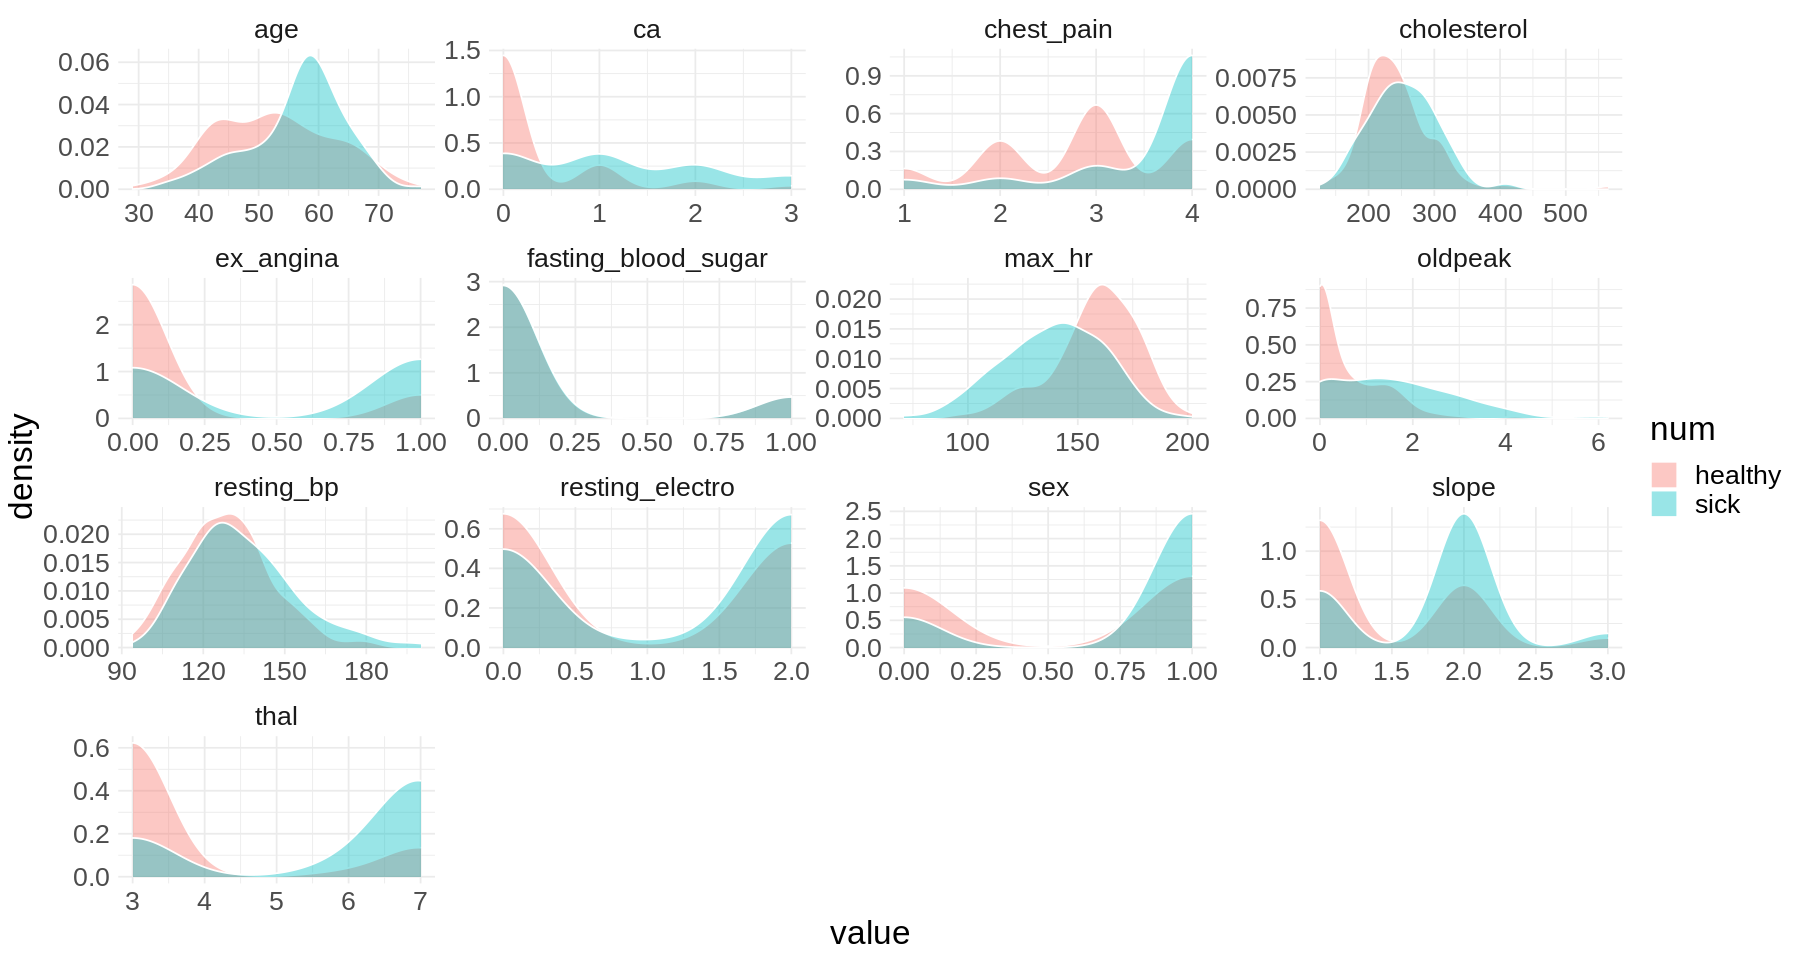

In [207]:
options(repr.plot.height = 8, repr.plot.width = 15)
heart_disease_data3|>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

In order to better identify the correlation between the variables in the data set and the diagnosis that was given we plotted each variable against density, and colour coded the regions that indicate healthy and sick, this shows us where most of the points lie, and therefore which ones are best to be used in our classifier. The less overlap, the better the variable will be in classifying the new observation. 

In [264]:
heart_clean <- heart_data_scaled_1 |>
select("age", "sex", "oldpeak", "chest_pain", "thal", "max_hr", "ex_angina", "ca", "num")
heart_clean

age,sex,oldpeak,chest_pain,thal,max_hr,ex_angina,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,0.65826822,-2.248337,-0.8929336,-0.2187793,1.415489,-0.7358115,healthy
0.377437,-1.4270869,-0.02561475,-2.248337,-0.8929336,0.5581676,-0.703919,-0.7358115,healthy
0.377437,0.6981985,0.65826822,-1.212082,-0.8929336,0.4718402,-0.703919,-0.7358115,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,2.0260342,0.8604283,1.1639696,-0.3482704,-0.703919,1.3873112,sick
0.2678458,0.6981985,0.1453560,0.8604283,1.1639696,-1.4705270,1.415489,0.3257499,sick
0.2678458,-1.4270869,-0.8804685,-1.2120816,-0.8929336,1.0761322,-0.703919,0.3257499,sick


Here we selected the variables from the data set that we decided to use for our classification. As we mentioned earlier, the variables were chosen based on which ones had the least overlap graphically, but from the ones that we chose this isn't completely true. This is because when choosing the ones with the least overlap, the classifier was doing a much better job at predicting healthy rather than sick individuals. Due to this we wanted to add predictor variables that not only showed less overlap, but also had more space taken up graphically by sick individuals, strengthening our classifier in that way. This is evident with sex, while there is quite a bit of overlap, most of the graph is dedicated to sick individuals, influencing our classifier. 

In [265]:
heart_disease_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

This is where we split our scaled and centered data into a training and test set, this makes it so that we can train our classifieer but also test it without necessarily having a completely new data set.

In [266]:
heart_disease_table <- heart_disease_train |>
group_by(num)|>
summarize(chest_pain = mean(chest_pain, na.rm = TRUE),
    thal = mean(thal, na.rm = TRUE),
    ex_angina = mean(ex_angina, na.rm = TRUE),
    oldpeak = mean(oldpeak, na.rm = TRUE),
    sex = mean(sex, na.rm = TRUE),
    ca = mean(ca, na.rm = TRUE),
    age = mean(age, na.rm = TRUE),
    max_hr = mean(max_hr, na.rm = TRUE))
heart_disease_table

num,chest_pain,thal,ex_angina,oldpeak,sex,ca,age,max_hr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,-0.3924982,-0.5142764,-0.3956414,-0.4235103,-0.3644442,-0.3883914,-0.2053892,0.3984619
sick,0.4117406,0.5225127,0.4104091,0.3630352,0.3476359,0.5008528,0.2542881,-0.3602850


While this wasn't necessary for the classification itself, we summarized the mean of all of our chosen variables so see if there were any evident patterns, or things that stuck out to use that might assist in how we build our classifier, one thing being that most of the means for a healthy individual lie in the negative region, something we made note of.  

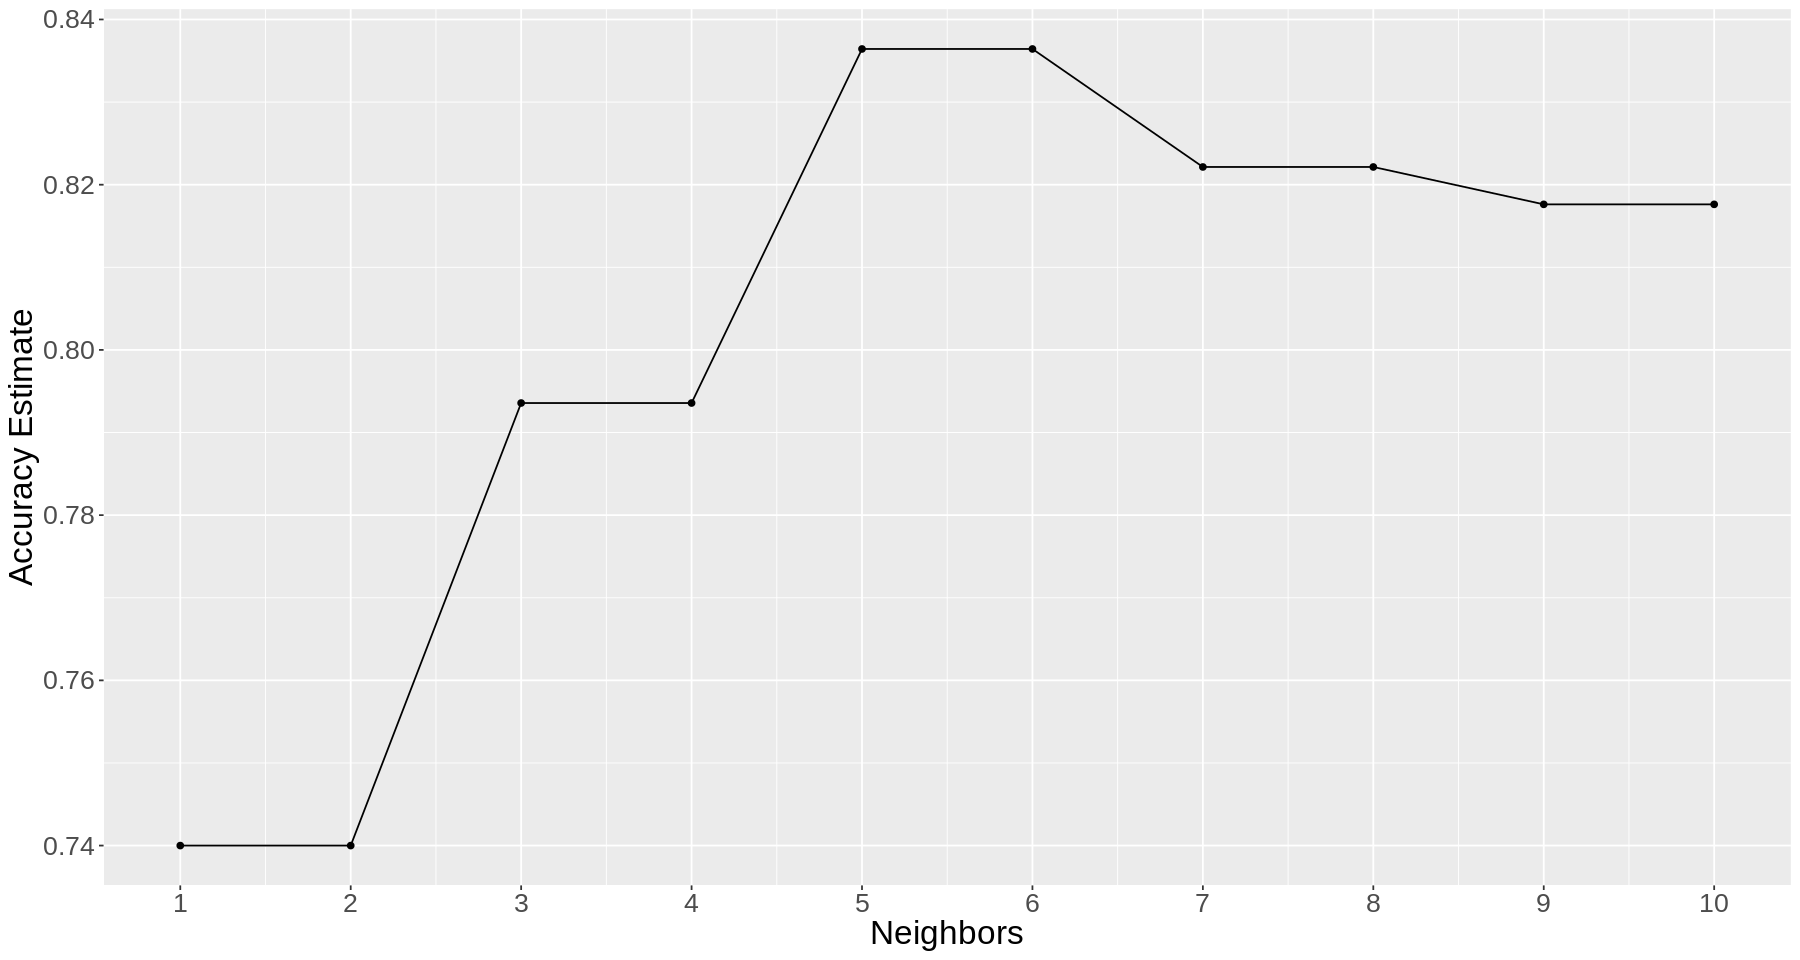

In [471]:
set.seed(2019) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

training_recipe <- recipe(num ~ ., data = heart_disease_train)

training_vfold <- vfold_cv(heart_disease_train, v = 10, strata = num)

#knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    #set_engine("kknn") |>
    #set_mode("classification")

#training_resample_fit <- workflow() |>
    #add_recipe(training_recipe) |>
    #add_model(knn_spec) |>
    #fit_resamples(resamples = training_vfold)

grid_frame <- tibble(neighbors = (c(1,2,3,4,5,6,7,8,9,10)))

knn_results <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = training_vfold, grid = grid_frame) |>
    collect_metrics()

accuracies <- knn_results |> 
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 10, by = 1))+
    theme(text = element_text(size = 20))
cross_val_plot

Here is where we train our classifier. Since this is a classification we are using k-nearest classifiation, and setting our neighbours to tune in order to find the best k value for our classifier. We then did a cross-fold validation in order to test our classifier against it self. We created a data frame of arbitrary k values and then tested it using the parameters that we created above. The results were then graphed, giving the above plot. The higher the accuracy estimate on the plot, the better the k value, here we can see that 5 is the best k value as it maximizes accuracy while minimizing the number of neighbors. 

In [274]:
set.seed(2019) 

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_disease_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1835749
Best kernel: rectangular
Best k: 5

Using the chosen k from above, an new classification specification was created, it was then added to a fit so create the parameters that will be used in our classifier

In [275]:
set.seed(2019) 

heart_predictions <- predict(heart_fit , heart_disease_test) |>
    bind_cols(heart_disease_test)
heart_predictions

heart_metrics <- heart_predictions |>
    metrics(truth = num, estimate = .pred_class)             
heart_metrics

heart_conf_mat <- heart_predictions |> 
    conf_mat(truth = num, estimate = .pred_class)
heart_conf_mat

.pred_class,age,sex,oldpeak,chest_pain,thal,max_hr,ex_angina,ca,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
healthy,-1.1568406,0.6981985,-0.53852698,-0.1758267,-0.8929336,1.2919508,1.415489,-0.7358115,healthy
healthy,-1.3760231,0.6981985,-0.88046846,0.8604283,-0.8929336,1.2487870,-0.703919,-0.7358115,healthy
healthy,0.7062108,0.6981985,-0.02561475,-0.1758267,-0.8929336,-0.5209253,1.415489,-0.7358115,healthy
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
sick,0.4870283,0.6981985,-0.02561475,0.8604283,0.6497438,-2.549620,-0.703919,1.3873112,sick
sick,0.2678458,0.6981985,0.14535599,0.8604283,1.1639696,-1.470527,1.415489,0.3257499,sick
healthy,0.2678458,-1.4270869,-0.88046846,-1.2120816,-0.8929336,1.076132,-0.703919,0.3257499,sick


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8285714
kap,binary,0.6593674


          Truth
Prediction healthy sick
   healthy      28    3
   sick          9   30

Here is where the actual prediction occurs, the test set was run with the classifier we created above. We then collected the metrics of accuracy of our classifier showing that it is about 83% accurate. From here we created a confusion matrix which displays the amount of predictions that were accurate and which were false more clearly.

In [276]:
heart_proportions <- heart_disease_train |>
group_by(num) |>
summarize(n = n()) |>
mutate(percent = 100*n/nrow(heart_disease_train))
heart_proportions

num,n,percent
<fct>,<int>,<dbl>
healthy,110,53.1401
sick,97,46.8599


In order to decide whether this amount of accuracy was appropriate we compared it to the majority classifier. This shows us that if the classifier were to make all of its predictions just based off the majority of points it would return 53% accuracy every time. This makes our classifier significantly better than the majority. Despite this, we are predicting the presence and absence of heart disease, so while this percentage is fairly high for accuracy, it can always be improved. 

In [411]:
conf <- structure(c(28, 9, 3, 30, 0.243243243, 0.09090909
), .Dim = 2:3, .Dimnames = list(c("Healthy_p", "Sick_p"), c("Healthy", 
"Sick", "class.error")))
conf

,Healthy,Sick,class.error
Healthy_p,28,3,0.24324324
Sick_p,9,30,0.09090909


Here we reformated our confusion matrix in order to make visualization of our results easier.

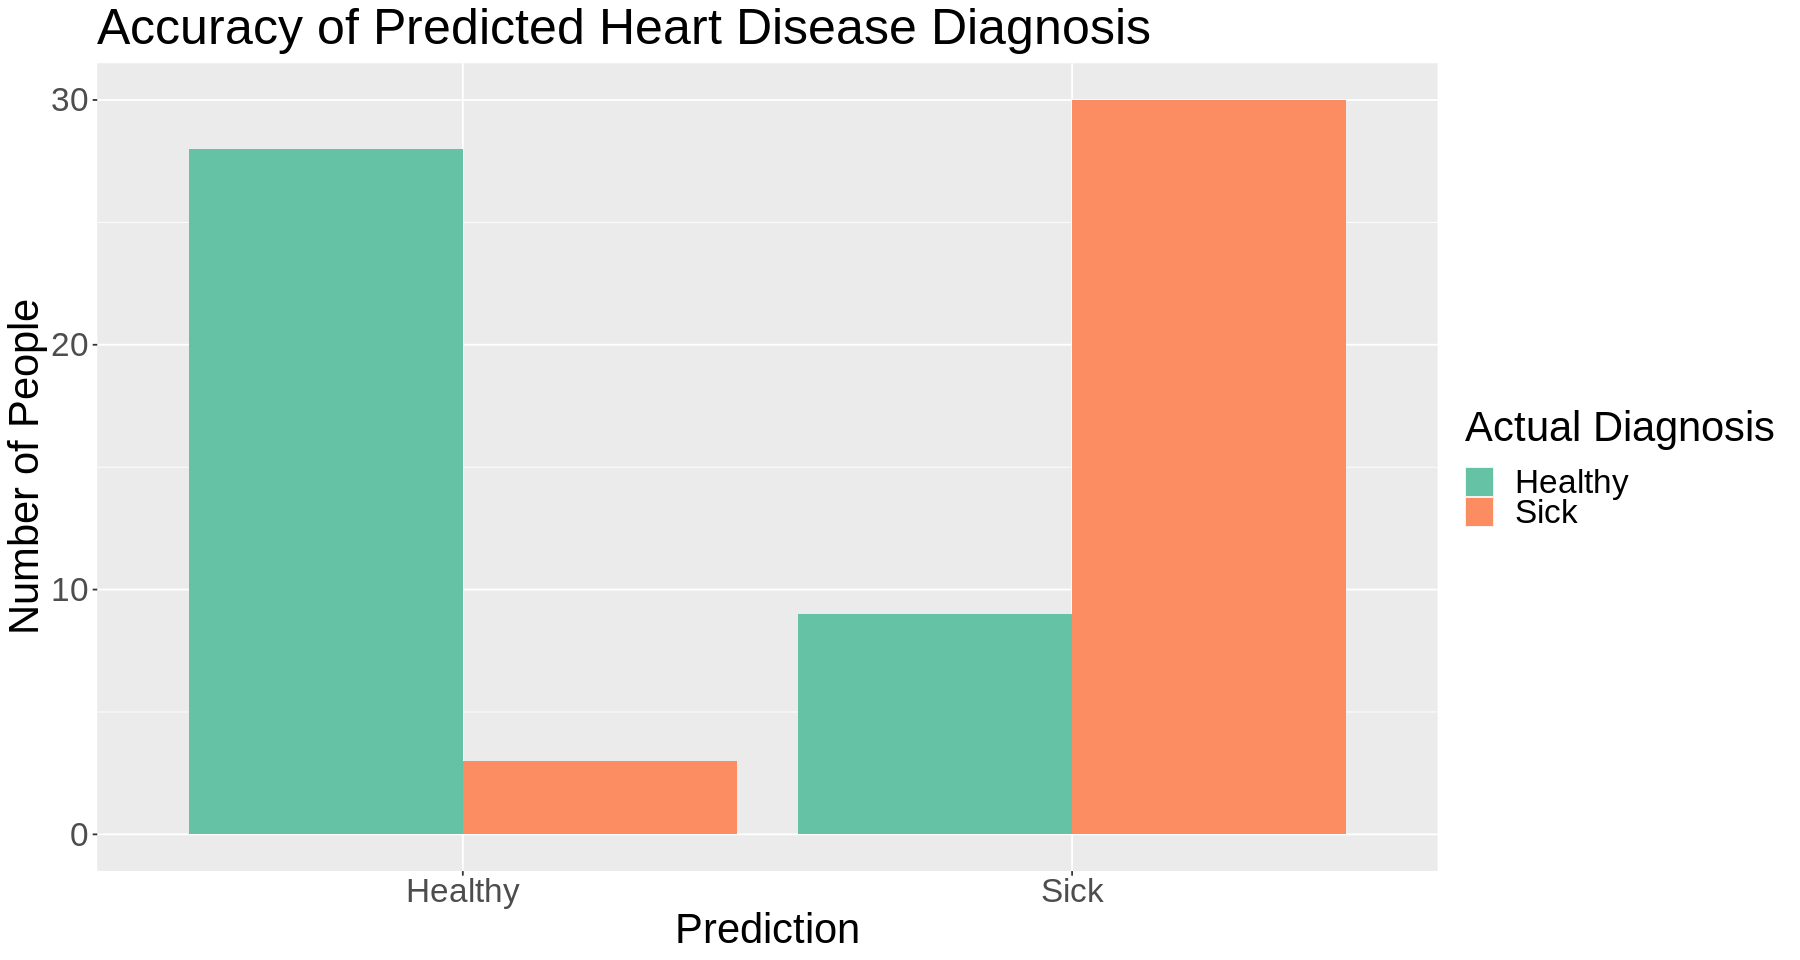

In [473]:
conf_plot <- conf|> 
as.data.frame(conf) |>
select(-class.error)|>
tibble::rownames_to_column("Prediction")|>
mutate(Prediction = case_when(Prediction == 1 ~ "Healthy" , Prediction == 2 ~ "Sick"))|>
pivot_longer(-Prediction, names_to = "Diagnosis")|>
ggplot((aes(x=Prediction,y=value,fill=Diagnosis))) + geom_bar(stat = "identity", position = "dodge") +
ylab("Number of People") +
xlab("Prediction") +
labs(fill = "Actual Diagnosis") +
ggtitle("Accuracy of Predicted Heart Disease Diagnosis") +
scale_fill_brewer(palette = "Set2") +
#geom_text(aes(label = value), vjust = 1.5, size = 15, color = "white", hjust = 3) + #can't figure out how to center the labels 
theme(text = element_text(size = 25))
print(conf_plot)

We took the confusion matrix that we reformatted from above and made converted it to a data frame, we then removed the class error column, wrangled the data to make it more appropriate for the visualization, and then organized it graphically to make the above visualization of our results. As you can see the predictions of healthy and sick where the individuals were actually healthy and sick respectively far out number the number of individuals who were misdiagnosed by our classifier. 